# Simple Linear Regression 

`Simple Linear Regression` is a statistical method used to model the relationship between a dependent variable (Y) and a single independent variable (X).      
It assumes that the relationship between the two variables is linear, meaning that changes in the independent variable lead to proportional changes in the dependent variable.

### Assumptions of Linear Regression
- Linearity – The relationship between X and Y is linear.
- Independence – The observations are independent of each other.
- Homoscedasticity – The variance of residuals (errors) is constant across all values of X.
- Normality – The residuals follow a normal distribution.

Step by Step:

1. Importing neccesary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Loading the dataset

In [2]:
df = pd.read_csv("Datasets/student-performance.csv")

In [3]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.518868,72.341163,74.604843
1,female,group C,some college,standard,completed,69.372786,90.693512,88.434536
2,female,group B,master's degree,standard,none,90.747297,95.972689,93.364383


### For Simple Linear Regression:

- Let's take reading score as independent variable (X) and writing score as dependent variable (Y).

In [4]:
new_df = df.drop(columns=['gender','race/ethnicity','parental level of education','lunch','test preparation course','math score'])

New DataFrame which contains reading score and writing score of students.

In [5]:
new_df

,reading score,writing score
0,72.341163,74.604843
1,90.693512,88.434536
2,95.972689,93.364383
3,57.336038,44.197319
4,78.920104,75.317157
...,...,...
995,99.461313,95.695893
996,55.106847,55.988351
997,71.709248,65.408511
998,78.607313,77.960825


Now, let's check the structure of the students dataset.

In [6]:
# Let's check the columns
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reading score  1000 non-null   float64
 1   writing score  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [7]:
# Check the shape of the DataFrame (rows, columns)
new_df.shape

(1000, 2)

In [8]:
# Look at some statistical information about the dataframe.
new_df.describe()

,reading score,writing score
count,1000.000000,1000.000000
mean,69.673433,68.565749
std,14.623925,15.208336
min,17.047755,10.846358
25%,59.637510,58.089913
50%,70.476326,69.497129
75%,79.890498,79.423098
max,100.975359,100.729562


## Visualising Data Using seaborn scatter plot.

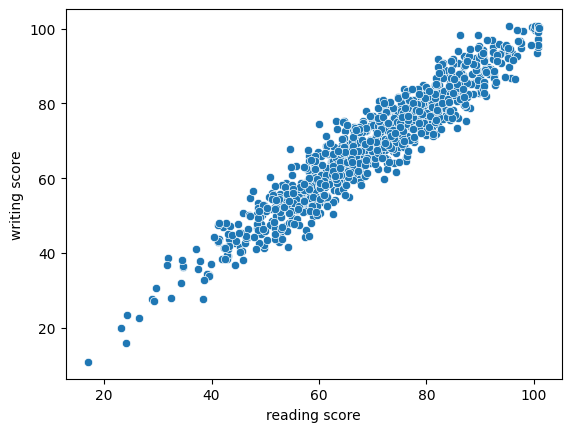

In [9]:
# Visualise the relationship between the reading score and writing score using scatterplots

sns.scatterplot(data=df,x='reading score',y='writing score')
plt.show()

# Perfroming Simple Linear Regression

<img src="images/linear.png" width='650px'>

# To Calculate slope and intercept:

<img src="images/ols.png" width='700px'>

## Dividing independent and dependent variable:

-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

In [10]:
X = new_df.iloc[:,0]
y = new_df.iloc[:,-1]

## Splitting Data into Training and Testing Sets

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)

`random_state` is a parameter in train_test_split that controls the random number generator used to shuffle the data before splitting it. In other words, it ensures that the same randomization is used each time you run the code, resulting in the same splits of the data.

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700,)
(700,)
(300,)
(300,)


## Performing Linear Regression

In [13]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
# lr.fit(X_train, y_train) # ERROR

### Why does this happen?

- If X_train.shape is (700,), it means X_train is a 1D array, but LinearRegression.fit() requires a 2D array with shape (700, n_features).
- Reshaping with .reshape(-1, 1) converts a 1D array into a column vector suitable for training.

In [14]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 1)
(700,)
(300, 1)
(300,)


In [16]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

## Coefficients Calculation

In [17]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

-0.7953241893015246
[0.99386597]


$y = -0.79532 + 0.9938 \times reading score $<br>

Now, let's use this equation to predict our writing score.

## Plotting best fit line:

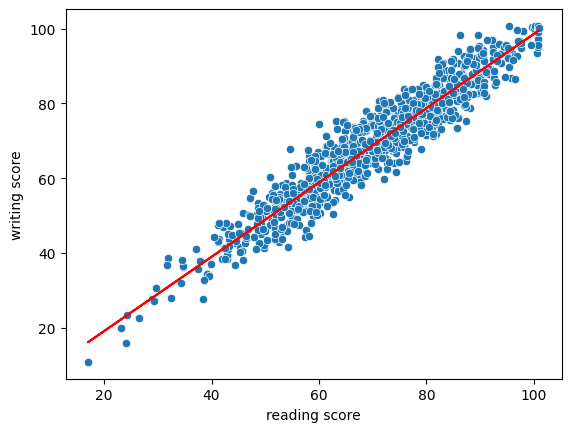

In [19]:
sns.scatterplot(data=df,x='reading score',y='writing score')
plt.plot(X_train,lr.predict(X_train),color='red')
plt.show()

## Predictions

In [ ]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [21]:
import numpy as np

In [24]:
lr.predict(np.array(0).reshape(1,1))

array([-0.79532419])

In [ ]:
type(y_pred)

numpy.ndarray

#### Evaluation Metrics:

- Root Mean Squared Error (RMSE) – Square root of MSE, giving errors in the same unit as the target variable.
- R² Score (Coefficient of Determination) – Measures how well the model explains the variance in the dependent variable.

In [ ]:
y_test.shape # cheek the shape to generate the index for plot

(300,)

Text(0, 0.5, 'Output')

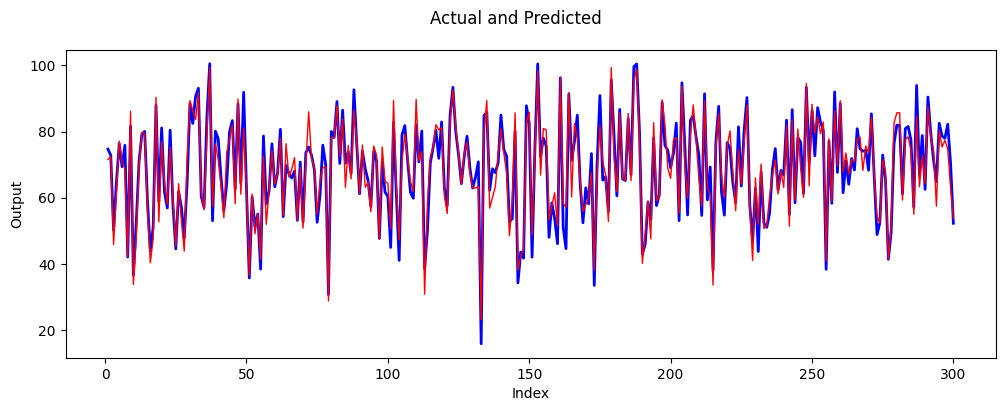

In [ ]:
# Actual vs Predicted
import matplotlib.pyplot as plt

c = [i for i in range(1,301)] # generating index 

fig = plt.figure(figsize=(12,4))
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=1, linestyle="-")
fig.suptitle('Actual and Predicted')              
plt.xlabel('Index')                               
plt.ylabel('Output')                               

In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score
rmse = root_mean_squared_error(y_test, y_pred)

In [ ]:
r_squared = r2_score(y_test, y_pred)

In [ ]:
print('Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 4.112072053676197
r_square_value : 0.9206222738934423


r2_score = 0.9206 means that your model is 92.06% is accurate on test data.